**Coursebook: Text Preprocessing**
- Course Length: 6 hours
- Last Updated: July 2023

___

- Developed by [Algoritma](https://algorit.ma)'s product division and instructors team

# Background

The coursebook is part of the [fill_here] prepared by [Algoritma](https://algorit.ma/). The coursebook is intended for a restricted audience only, i.e. the individuals and organizations having received this coursebook directly from the training organization. It may not be reproduced, distributed, translated or adapted in any form outside these individuals and organizations without permission.

Algoritma is a data science education center based in Jakarta. We organize workshops and training programs to help working professionals and students gain mastery in various data science sub-fields: data visualization, machine learning, data modeling, statistical inference etc.

**Course Objective**:

**Text Preprocessing**
- Regular Expression for Text Cleansing
- Stemming 
- Text Normalization
- Stopwords Removal

**Text Preparation** 
- Tokenization
- Word Embedding: Bag of Words


---

# Libraries

In [ ]:
# data analysis
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
# import seaborn as sns

# set seed
import random
random.seed(123)
np.random.seed(123)

# text processing
import re
import string
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.model_selection import train_test_split

import pickle

# Text Data: Machine Learning Workflow

1. Load Dataset
1. Text Preprocessing
    1. Case folding
    1. Text cleansing
    1. Text normalization 
    1. Stemming or Lemmatization
    1. Stopwords removal
1. Tokenization & Word Embedding (Bag of Words)
1. EDA: 
    1. Count unique words
    1. Wordcloud
    1. Count sentence length
1. Cross Validation
1. Model Fitting
1. Prediction & Evaluation

# Load Dataset

Pada bagian ini, mari kita lakukan klasifikasi sentimen pada dataset yang dikumpulkan dari Twitter terkait sentimen publik terhadap suatu penyedia layanan seluler di Indonesia. Dataset tersebut memiliki 2 kelas sentimen yaitu positif dan negatif. Sebelum dipublikasikan, dataset ini telah diproses terlebih dahulu sebagai berikut:

- Mengganti nama/identitas penyedia layanan dengan tag PROVIDER_NAME
- Mengganti alamat URL dengan tag URL
- Mengganti @username pengguna dengan tag USER_MENTION
- Mengganti nama produk dengan tag PRODUCT_NAME

> Referensi data: [Rofiqoh, U., Perdana, R.S., & Fauzi, M.A. (2017)](https://github.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/blob/master/dataset_tweet_sentiment_cellular_service_provider.csv)

Baca data `dataset_tweet_sentiment_cellular_service_provider.csv` menggunakan `pandas`

In [ ]:
df = pd.read_csv('data_input/dataset_tweet_sentiment_cellular_service_provider.csv').drop(columns='Id')
df.head()

,Sentiment,Text Tweet
0,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,negative,Selamat malam PENDUSTA <PROVIDER_NAME>


**💬 Diskusi**

Dengan melihat data yang kita miliki, text preprocessing seperti apa yang perlu kita lakukan?

*Jawab:*
> - 
> - 
> - 

# Text Preprocessing

Text preprocessing adalah metode untuk membersihkan dan menyiapkan data teks untuk dipelajari oleh model. Data teks berisi *noise* dalam berbagai bentuk seperti emotikon, tanda baca, dan penggunaan huruf kapital yang berbeda-beda. Data teks mentah mungkin berisi teks yang tidak diinginkan atau tidak penting, sehingga model machine learning dapat menghasilkan akurasi yang kurang memuaskan. Kita tidak boleh memasukkan data mentah tanpa pemrosesan awal untuk membuat model karena **pemrosesan awal teks secara langsung meningkatkan performa model**. Dalam beberapa kasus, jika kita memasukkan data mentah tanpa teknik preprocessing, model akan bingung dan memberikan hasil acak.

## Case Folding

*Case folding* adalah proses penyeragaman teks huruf pada seluruh dokumen dalam korpus. Dalam klasifikasi teks, case folding umumnya dilakukan dengan menyeragamkan teks dokumen dalam korpus menjadi **huruf kecil** (*lowercase*). Lowercase folding dilakukan untuk menyeragamkan semua bentuk huruf menjadi huruf kecil sehingga tidak ada perbedaan kata/istilah pada saat ekstraksi fitur karena perbedaan bentuk huruf.

In [ ]:
df['text_lower'] = 
df.head()

,Sentiment,Text Tweet,text_lower
0,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,<user_mention> #boikot_<provider_name> gunakan...
1,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...","saktinya balik lagi, alhamdulillah :v <provide..."
2,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,selamat pagi <provider_name> bisa bantu kenap...
3,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,dear <provider_name> akhir2 ini jaringan data ...
4,negative,Selamat malam PENDUSTA <PROVIDER_NAME>,selamat malam pendusta <provider_name>


> 💡 **Tips:** Dalam *text preprocessing*, praktik terbaiknya adalah **membuat kolom baru untuk setiap prapemrosesan**. Hal ini sangat membantu ketika kita ingin menyempurnakan evaluasi model dengan langkah-langkah preprocessing yang berbeda.

## Text Cleansing

*Text cleansing* terdiri dari penghapusan atribut data yang tidak perlu seperti tanda baca tertentu (titik, koma, titik koma, kutipan, dan sebagainya) dan alamat Uniform Resource Locator (URL). Khusus untuk data Twitter, beberapa atribut lain tidak diperlukan dalam proses klasifikasi, yaitu karakter RT (re-tweet) dan username (nama akun yang menulis tweet). URL, RT/sebutan, dan nama produk dalam kumpulan data ini telah diganti dengan tag.

> Selama pembersihan teks, biasanya menggunakan **regular expression (regex)**. Regex adalah urutan karakter yang menentukan pola pencarian dalam teks. Berikut referensi untuk mempelajari lebih lanjut tentang regex:
> - https://www.w3schools.com/python/python_regex.asp
> - https://regex101.com/

### Regular Expression

*Regular expression* atau *regex* dapat digunakan untuk menangkap pola dalam teks. *Tool* ini sangat berguna ketika kita punya beberapa pola yang ingin kita ganti dengan karakter tertentu. 

Misalkan kita ingin mengganti seluruh angka menjadi spasi. Angka memiliki rentang dari 0-9, agar kita tidak harus mengganti angka tersebut satu-persatu, kita dapat menggunakan regex.

*Regular expression* di Python dapat dilakukan dengan library `re`.

In [ ]:
import re # regex

#### Pola

> Tanda kurung `[ ]` menampung pola-pola yang ingin dicari

Misalkan kita ingin mengganti tanda  `-`, `*`, dan tanda `/` dengan tanda titik `.`

In [ ]:
re.sub('[-*/]', '.', 'masa setiap hari  pulsa berkurang 1500-2100 bisa 2-3*/hari')

'masa setiap hari  pulsa berkurang 1500.2100 bisa 2.3..hari'

Kita juga dapat menggantinya dengan *empty string*

In [ ]:
re.sub()

'masa setiap hari  pulsa berkurang 15002100 bisa 23hari'

> `\w` dan `\W` cocok dengan karakter kata (*word character*)

`\w` cocok dengan karakter kata alfanumerik apa pun. *Word character* adalah huruf besar dan kecil, angka, dan karakter garis bawah ( _ ):

In [ ]:
re.sub()

'      -  -*/'

`\W` adalah kebalikannya. `\W` cocok dengan karakter apapun yang bukan selain alfanumerik dan *underscore*:

In [ ]:
re.sub()

'masasetiapharipulsaberkurang15002100bisa23hari'

> `\d` dan `\D` cocok dengan angka (*digit*).

`\d` cocok dengan karakter angka apa pun. Sebaliknya, `\D` cocok dengan karakter apa pun yang bukan angka.

In [ ]:
re.sub()

'masa setiap hari  pulsa berkurang - bisa -*/hari'

In [ ]:
re.sub()

'1500210023'

> `\s` and `\S` cocok dengan karakter spasi dan baris baru (*newline*).

`\s` cocok dengan karakter spasi dan *new line*:

In [ ]:
re.sub()

'masasetiapharipulsaberkurang1500-2100bisa2-3*/hari'

`\S` adalah kebalikan dari `\s`, sehingga cocok dengan karakter apapun selain spasi dan *new line*:

In [ ]:
re.sub()

'        '

#### Quantifiers

*Quantifier* menunjukkan berapa kali suatu bagian harus muncul agar pencocokan berhasil.

> Plus (+) cocok dengan satu atau lebih pengulangan.

In [ ]:
print(re.sub('\s', '/', 'masa setiap hari  pulsa berkurang 1500-2100 bisa 2-3*/hari'))   # tanpa +

print(re.sub('\s+', '/', 'masa setiap hari  pulsa berkurang 1500-2100 bisa 2-3*/hari'))  # dengan +

masa/setiap/hari//pulsa/berkurang/1500-2100/bisa/2-3*/hari
masa/setiap/hari/pulsa/berkurang/1500-2100/bisa/2-3*/hari


Tanda plus (+) menangkap pengulangan pola lebih dari 1x, sehingga pada contoh di atas, spasi dobel hanya tergantikan oleh 1 garis miring (`/`). Langkah ini akan sangat berguna ketika kita ingin mengurangi pola berulang menjadi 1 pola saja.

Contoh: kita ingin mengganti spasi dobel dengan 1 spasi

In [ ]:
print(re.sub('\s', ' ', 'masa setiap hari  pulsa berkurang 1500-2100 bisa 2-3*/hari'))   # tanpa +

print(re.sub('\s+', ' ', 'masa setiap hari  pulsa berkurang 1500-2100 bisa 2-3*/hari'))  # dengan +

masa setiap hari  pulsa berkurang 1500-2100 bisa 2-3*/hari
masa setiap hari pulsa berkurang 1500-2100 bisa 2-3*/hari


#### Replacement

Untuk mengganti suatu kata dengan kata lainnya, dapat langsung digunakan method `.replace()`

In [ ]:
text = "testes123 <provider_name> ..."


'testes123  ...'

Untuk tanda baca, Python menyediakan kumpulan tanda baca (*punctuation*) dari library `string`

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Kita dapat menggabungkan proses text cleansing dalam satu fungsi, kali ini kita beri nama fungsi `text_cleansing()`.

In [ ]:
def text_cleansing(text):
    
    # remove tags
    text = text.replace('<provider_name>', '')
    text = text.replace('<url>', '')
    text = text.replace('<user_mention>', '')
    text = text.replace('<product_name>', '')
    
    # remove non ASCII (emoticon, chinese word, etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    
    # remove digits (using regex) -> subtitute
    text = re.sub()
    
    # remove punctuation
    text = re.sub()
    
    # remove extra whitespace in the middle of sentence
    text = re.sub()

    # remove whitespace in the beginning and end of sentence
    text = text.strip()
    
    return text

Mari kita lihat bagaimana fungsi `text_cleansing` bekerja pada `sample_text`

In [ ]:
# sebelum cleansing
sample_text = df['text_lower'][8]
sample_text

'keluhan gak ditanggapi. bikin emosi aja. pulsaku dicuri terus. soak deh. masa setiap hari pulsa berkurang 1500-2100 bisa 2-3*/hari'

In [ ]:
# setelah cleansing
sample_text_clean = 
sample_text_clean

'keluhan gak ditanggapi bikin emosi aja pulsaku dicuri terus soak deh masa setiap hari pulsa berkurang bisa hari'

Kita dapat menerapkan fungsi ke kolom secara iteratif dengan menggunakan method `.apply()`

In [ ]:
df['text_clean'] = df['text_lower'].apply(text_cleansing)
df.head()

,Sentiment,Text Tweet,text_lower,text_clean
0,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,<user_mention> #boikot_<provider_name> gunakan...,boikot gunakan produk bangsa sendiri
1,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...","saktinya balik lagi, alhamdulillah :v <provide...",saktinya balik lagi alhamdulillah v
2,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,selamat pagi <provider_name> bisa bantu kenap...,selamat pagi bisa bantu kenapa di dalam kamar ...
3,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,dear <provider_name> akhir2 ini jaringan data ...,dear akhir ini jaringan data lemot banget pada...
4,negative,Selamat malam PENDUSTA <PROVIDER_NAME>,selamat malam pendusta <provider_name>,selamat malam pendusta


### Text Normalization

Selanjutnya dilakukan preprocessing data dengan proses normalisasi teks untuk mengubah **bentuk kata informal menjadi formal**. Bentuk kata informal yang sering digunakan netizen Indonesia dalam menulis tweet antara lain:

1. kata-kata yang menunjukkan perasaan (misalnya hiks (sedih), wkwkwk/wkwk (tertawa), huhuhu (menangis), dan lain-lain);
2. pengulangan karakter untuk menonjolkan kata tertentu (misal: lamaaaa (lama), sorryyyyy (maaf), dan lain-lain);
3. penghilangan vokal (misalnya gk (tidak), jgn (jangan), dan lain-lain);
4. penggunaan kata-kata gaul (misal: ciyus (serius), dah (sudah), dan lain-lain);
5. penggantian huruf dengan angka (misal s4ya (me), disk0n (diskon), dan lain-lain).

> Kita dapat menggunakan kamus tipo dan singkatan yang didapat dari gabungan kamus tipo/singkatan dari [Ibrohim dan Budi (2019)](https://github.com/okkyibrohim/id-multi-label-hate-speech-and-abusive-language-detection).

In [ ]:
# catatan: kamus dapat disesuaikan tergantung pada kasus Anda
normalized_word = pd.read_csv('data_input/new_kamusalay.csv', header=None)
data_dict = dict(zip(normalized_word[0], normalized_word[1]))
len(data_dict)

15166

Kita dapat membuat fungsi `normalize_text` untuk memetakan kalimat informal ke formal.

In [ ]:
def normalize_text(text):
    return ' '.join(data_dict.get(word, word) for word in text.split())

Fungsi di atas ditulis menggunakan [Python list comprehension](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions). Jika Anda tidak terbiasa dengan itu, Anda dapat merujuk ke versi berikut:

```{python}
def normalize_text(text):
    # temporary list
    result = []
    
    # split sentence into list of words
    split_text = text.split()
    
    # loop for each word
    for word in split_text:
        new_word = data_dict.get(word, word) # return normalized word if it exists in the dictionary
        result.append(new_word)
    
    # combine list of words into sentence
    combine_text = ' '.join(result)
    
    return combine_text
```

In [ ]:
# before
sample_text_clean

'keluhan gak ditanggapi bikin emosi aja pulsaku dicuri terus soak deh masa setiap hari pulsa berkurang bisa hari'

In [ ]:
# after
sample_text_normalized = 
sample_text_normalized

'keluhan tidak ditanggapi bikin emosi saja pulsaku dicuri terus soak deh masa setiap hari pulsa berkurang bisa hari'

Kita dapat menerapkan fungsi ke kolom secara iteratif dengan menggunakan method `.apply()`

In [ ]:
df['text_normalized'] = df['text_clean'].apply(normalize_text)

In [ ]:
df.head()

,Sentiment,Text Tweet,text_lower,text_clean,text_normalized
0,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,<user_mention> #boikot_<provider_name> gunakan...,boikot gunakan produk bangsa sendiri,boikot gunakan produk bangsa sendiri
1,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...","saktinya balik lagi, alhamdulillah :v <provide...",saktinya balik lagi alhamdulillah v,saktinya balik lagi alhamdulillah v
2,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,selamat pagi <provider_name> bisa bantu kenap...,selamat pagi bisa bantu kenapa di dalam kamar ...,selamat pagi bisa bantu kenapa di dalam kamar ...
3,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,dear <provider_name> akhir2 ini jaringan data ...,dear akhir ini jaringan data lemot banget pada...,dear akhir ini jaringan data lemot banget pada...
4,negative,Selamat malam PENDUSTA <PROVIDER_NAME>,selamat malam pendusta <provider_name>,selamat malam pendusta,selamat malam pendusta


### Stemming

*Stemming* adalah proses pemotongan kata berimbuhan menjadi kata dasar. Kita akan menggunakan algoritma Nazief-Adriani (Adriani, et al., 2007) yang diimplementasikan menggunakan [Library Sastrawi](https://github.com/har07/PySastrawi)

Contoh stemming:

- melarikan → lari
- berlari → lari
- berlarian → lari
- lari-larian → lari

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
# before
sample_text_normalized

'keluhan tidak ditanggapi bikin emosi saja pulsaku dicuri terus soak deh masa setiap hari pulsa berkurang bisa hari'

In [ ]:
# after
sample_text_stemmed = 
sample_text_stemmed

'keluh tidak tanggap bikin emosi saja pulsa curi terus soak deh masa tiap hari pulsa kurang bisa hari'

Kita dapat menerapkan fungsi ke kolom secara iteratif dengan menggunakan method `.apply()`.

**Disclaimer**: Proses stemming akan memakan waktu sekitar 2-3 menit

In [ ]:
df['text_stemmed'] = df['text_normalized'].apply(stemmer.stem)
df.head()

,Sentiment,Text Tweet,text_lower,text_clean,text_normalized,text_stemmed
0,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,<user_mention> #boikot_<provider_name> gunakan...,boikot gunakan produk bangsa sendiri,boikot gunakan produk bangsa sendiri,boikot guna produk bangsa sendiri
1,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...","saktinya balik lagi, alhamdulillah :v <provide...",saktinya balik lagi alhamdulillah v,saktinya balik lagi alhamdulillah v,sakti balik lagi alhamdulillah v
2,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,selamat pagi <provider_name> bisa bantu kenap...,selamat pagi bisa bantu kenapa di dalam kamar ...,selamat pagi bisa bantu kenapa di dalam kamar ...,selamat pagi bisa bantu kenapa di dalam kamar ...
3,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,dear <provider_name> akhir2 ini jaringan data ...,dear akhir ini jaringan data lemot banget pada...,dear akhir ini jaringan data lemot banget pada...,dear akhir ini jaring data lot banget padahal h
4,negative,Selamat malam PENDUSTA <PROVIDER_NAME>,selamat malam pendusta <provider_name>,selamat malam pendusta,selamat malam pendusta,selamat malam dusta


### Stopwords removal

*Stopwords* adalah kata-kata umum yang tidak berarti, seperti konjungsi (kata hubung), kata ganti orang (aku, saya, dia), dsb. Kata-kata seperti ini kurang bermakna dan tidak memiliki kecenderungan sentimen negatif maupun positif. Oleh karena itu, *stopwords* umumnya perlu dihapus dari data teks.

In [ ]:
# uncomment & run this code ONCE only
# import nltk
# nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords

# get stopword indonesia
list_stopwords = stopwords.words('indonesian')
len(list_stopwords)

758

> 💡 Note: Anda dapat menentukan sendiri daftar stopwords yang akan dihapus.

In [ ]:
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in list_stopwords])

Fungsi di atas ditulis menggunakan [Python list comprehension](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions). Jika Anda tidak terbiasa dengan itu, Anda dapat merujuk ke versi berikut:

```{python}
def remove_stopwords(text):
    # temporary list
    result = []
    
    # split sentence into list of words
    split_text = text.split()
    
    # loop for each word
    for word in split_text:
        if word not in list_stopwords:
            result.append(word) # append word that not in stopwords list
            
    # combine list of words into sentence
    combine_text = ' '.join(result)

    return combine_text
```

In [ ]:
# before
sample_text_stemmed

'keluh tidak tanggap bikin emosi saja pulsa curi terus soak deh masa tiap hari pulsa kurang bisa hari'

In [ ]:
# after


'keluh tanggap bikin emosi pulsa curi soak deh pulsa'

Kita dapat menerapkan fungsi ke kolom secara iteratif dengan menggunakan method `.apply()`

In [ ]:
df['text_no_stopwords'] = df['text_stemmed'].apply(remove_stopwords)

In [ ]:
df.head()

,Sentiment,Text Tweet,text_lower,text_clean,text_normalized,text_stemmed,text_no_stopwords
0,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,<user_mention> #boikot_<provider_name> gunakan...,boikot gunakan produk bangsa sendiri,boikot gunakan produk bangsa sendiri,boikot guna produk bangsa sendiri,boikot produk bangsa
1,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...","saktinya balik lagi, alhamdulillah :v <provide...",saktinya balik lagi alhamdulillah v,saktinya balik lagi alhamdulillah v,sakti balik lagi alhamdulillah v,sakti alhamdulillah v
2,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,selamat pagi <provider_name> bisa bantu kenap...,selamat pagi bisa bantu kenapa di dalam kamar ...,selamat pagi bisa bantu kenapa di dalam kamar ...,selamat pagi bisa bantu kenapa di dalam kamar ...,selamat pagi bantu kamar sinyal hilang panggil...
3,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,dear <provider_name> akhir2 ini jaringan data ...,dear akhir ini jaringan data lemot banget pada...,dear akhir ini jaringan data lemot banget pada...,dear akhir ini jaring data lot banget padahal h,dear jaring data lot banget h
4,negative,Selamat malam PENDUSTA <PROVIDER_NAME>,selamat malam pendusta <provider_name>,selamat malam pendusta,selamat malam pendusta,selamat malam dusta,selamat malam dusta


Kita telah menyelesaikan tahap preprocessing, dan setiap hasil pemrosesan dibagi menjadi nilai kolom kerangka data. Memisahkan hasil pengolahan data merupakan langkah yang baik karena kita tidak perlu mengulang proses preprocessing jika kita membutuhkan data dengan teknik preprocessing yang berbeda. Efisiensi ini akan terlihat jika data yang digunakan cukup besar.

Karena tahap preprocessing cukup panjang, kita dapat menyimpan teks yang telah diproses sebagai file *pickle*.

In [ ]:
# saving dataframe into pickle
#df.to_pickle('data_input/df_tweet_sentiment_general_and_cellular_service_provider_preprocessed.pkl')

# open the pickle file
#df = pd.read_pickle('data_input/df_tweet_sentiment_cellular_service_provider_preprocessed.pkl')

# Tokenization & Word Embedding

*Tokenization* (tokenisasi) adalah cara memisahkan dokumen menjadi unit lebih kecil yang disebut *token*. Umumnya, 1 token berisi 1 kata, namun pada beberapa kasus 1 token dapat berisi 1 kalimat.

Setelah tokenization, dapat dilakukan proses *word embedding*. Word embedding adalah tahap merepresentasikan suatu kata dalam bentuk numerik. Perlu diingat kembali bahwa komputer tidak memahami arti kata, maka kita perlu mengubah tiap kata menajadi suatu bentuk numerik. Untuk kasus klasifiaksi, kita dapat menggunakan metode Bag of Words.

## Bag of Words

Bag of Words (BoW) menghitung jumlah kemunculan kata dalam tiap dokumen. Misalkan kita memiliki dua dokumen tweet sebagai berikut.
1. sinyal kantor dan sinyal rumah sama sama jelek
1. pakai wifi kantor tapi sinyal tetap jelek

Maka BoW akan membuat suatu tabel seperti berikut.

|  | sinyal | kantor | dan | rumah | sama | jelek | pakai | wifi | tapi | tetap |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Doc 0 | 2 | 1 | 1 | 1 | 2 | 1 | 0 | 0 | 0 | 0 |
| Doc 1 | 1 | 1 | 0 | 0 | 0 | 1 | 1 | 1 | 1 | 1 |

Kita dapat membuat Bag of Words menggunakan fungsi `CountVectorizer` dari library `scikit-learn`. 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

X = 

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
vocab = vectorizer.get_feature_names_out()
docterm = pd.DataFrame(X.todense(), columns=vocab)

docterm

,acara,aceh,adhan,aduh,ajaib,ajar,akses,aksi,aktif,aktivitas,...,xd,ya,yess,yonder,youtube,youtubenya,youtubetahun,yoyakarta,yuk,zalim
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exploratory Data Analysis (EDA)

Sebelum kita memasukkan data bersih ke dalam model machine learning, mari kita eksplorasi insight dari data yang kita miliki.

## Count Unique Words

Kita dapat menghitung jumlah kemunculan suatu kata dari keseluruhan dokumen. Karena tiap baris adalah satu dokumen, dan tiap kolom adalah satu kata, maka kita dapat menjumlahkan isi nilai per kolom untuk mendapatkan jumlah total kemunculan per kata. 

Hal ini dapat kita capai menggunakan method `.sum()`. Parameter:
- `axis = 0` : menjumlahkan seluruh baris untuk tiap kolom
- `axis = 1` : menjumlahkan seluruh kolom untuk tiap baris

Selanjutnya hasil penjumlahkan dapat kita urutkan dengan method `sort_values()`.

In [ ]:
term_sum = 


pakai          54
sinyal         43
jaring         39
boikot         31
kuota          29
               ..
kecepatanya     1
kbps            1
kb              1
kasihan         1
zalim           1
Length: 621, dtype: int64

Kita juga dapat menghitung jumlah kata yang hanya muncul 1x dengan menjumlahkan `term_sum` yang bernilai 1.

In [ ]:
# mencari jumlah kata yang hanya muncul 1x
sum(term_sum == 1)

370

> 💡 **Insights:**
> - Terdapat 623 kata unik dari keseluruhan dokumen
> - Kata yang sering muncul: `pakai`, `sinyal`, `jaring`, `boikot`, `kuota` 
> - Ada 373 kata unik yang hanya muncul 1x (dari 300 tweets), follow up:    
>   - Kumpulkan lebih banyak data, atau
>   - Menghapus kata yang muncul hanya sekali (karena terlalu spesifik)

### Wordcloud

Dari jumlah kemunculan kata yang telah kita dapatkan, kita dapat memvisualisasikannya dalam bentuk **wordcloud**. Wordcloud membentuk kumpulan kata yang ukurannya menunjukkan frekuensi kemunculan. Semakin besar ukuran sebuah kata, berarti semakin sering kata tersebut muncul. Begitu pula sebaliknya, semakin kecil berarti semakin jarang.

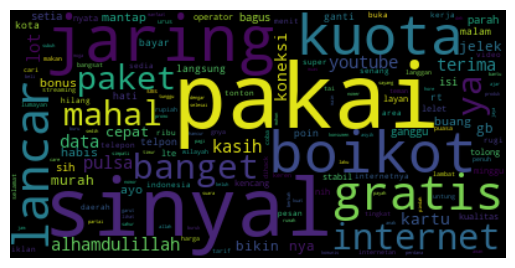

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate_from_frequencies(term_sum)
plt.imshow(wordcloud)
plt.axis("off")

Kita dapat mengganti warna background wordcloud kita dengan parameter `backgrund_color`.

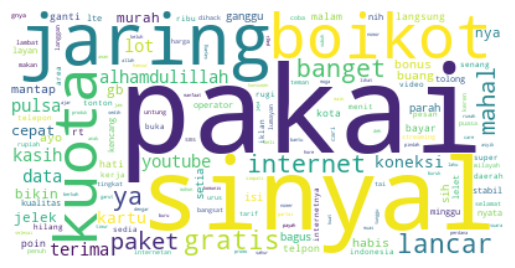

In [ ]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(term_sum)
plt.imshow(wordcloud)
plt.axis("off")

Untuk mengganti warna kata-kata yang muncul, kita dapat menggunakan parameter `colormap`. 

- Pilihan warna: [Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)
- Contoh warna pada wordcloud: [Wordcloud - colormap](https://www.kaggle.com/code/niteshhalai/wordcloud-colormap)

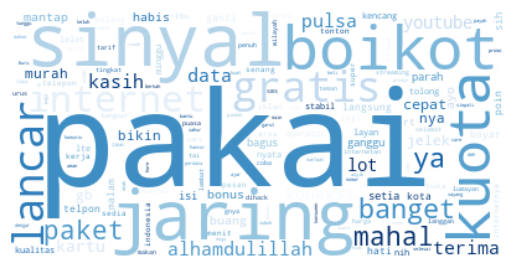

In [ ]:
wordcloud = WordCloud(background_color='white', colormap='Blues').generate_from_frequencies(term_sum)
plt.imshow(wordcloud)
plt.axis("off")

Kita dapat menyimpan wordcloud yang telah kita buat menjadi file gambar (PNG)

In [ ]:
# Save the image in the img folder:
wordcloud.to_file("tweet_wordcloud.png")

# Cross Validation

*Cross validation* adalah prosedur resampling yang digunakan untuk mengevaluasi model machine learning pada sampel data terbatas. Prosedurnya melibatkan pembagian dataset menjadi dua subset.

- Data train: Digunakan untuk dipelajari oleh model.
- Data test: Digunakan untuk mengevaluasi model machine learning yang telah belajar.

Tujuannya adalah untuk memperkirakan performa model machine learning pada data baru (data yang tidak digunakan untuk melatih model). Mari kita bagi menggunakan proporsi 75:25

In [ ]:
from sklearn.model_selection import train_test_split

- Feature: docterm (hasil BoW)
- Target: Sentiment

In [ ]:
X_train, X_test, y_train, y_test = 

print("TRAIN:", X_train.shape)
print("TEST:", X_test.shape)

TRAIN: (225, 621)
TEST: (75, 621)


In [ ]:
# checking the data split
print("CLEANED TEXT (feature):", X_train.iloc[0])
print("SENTIMENT (target):", y_train.iloc[0])

CLEANED TEXT (feature): acara           0
aceh            0
adhan           0
aduh            0
ajaib           0
               ..
youtubenya      0
youtubetahun    0
yoyakarta       0
yuk             0
zalim           0
Name: 107, Length: 621, dtype: int64
SENTIMENT (target): negative


In [ ]:
df.loc[107, 'text_lower']

'<provider_name> <provider_name>4glte <provider_name> #bogor #area  <url> … udah 3 bulan tidak ada tanggapan yg jelas '

# Model Fitting & Evaluation

Kali ini kita akan menggunakan model Naive Bayes. Naive Bayes merupakan model yang ringan dan cepat namun memberikan hasil yang memuaskan, terutama untuk kasus klasifikasi data teks.

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

model = 
y_pred = 
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.8266666666666667


Dari hasil evaluasi di atas, kita mendapatkan nilai akurasi 0.827, yang artinya model kita berhasil memprediksi 83% tweet dengan benar.

# 📝 Summary

Akhirnya, kita telah mencapai akhir dari kursus ini. Dan untuk meringkas apa yang telah kita pelajari, inilah beberapa poin yang mencakup materi kita:

- *Text cleansing* adalah proses *case-by-by*, tetapi langkah yang paling umum meliputi: *case-folding*, pembersihan dan normalisasi teks, stemming, dan menghapus stopwords.
- Untuk dapat dimasukkan ke model machine learning, kita perlu memecah dokumen menjadi per kata.

# External Link



**Dataset Citation**

Muhammad Okky Ibrohim and Indra Budi. 2019. Multi-label Hate Speech and Abusive Language Detection in Indonesian Twitter. In ALW3: 3rd Workshop on Abusive Language Online, 46-57. [github repository](https://github.com/okkyibrohim/id-multi-label-hate-speech-and-abusive-language-detection/blob/master/new_kamusalay.csv)

Rofiqoh, U., Perdana, R.S., & Fauzi, M.A. (2017). Analisis Sentimen Tingkat Kepuasan Pengguna Penyedia Layanan Telekomunikasi Seluler Indonesia Pada Twitter Dengan Metode Support Vector Machine dan Lexicon Based Features. Jurnal Pengembangan Teknologi Informasi Dan Ilmu Komputer, 1(12), 1725-1732. Diambil dari http://j-ptiik.ub.ac.id/index.php/j-ptiik/article/view/628

Tala, F. Z. (2003). A Study of Stemming Effects on Information Retrieval in Bahasa Indonesia. Thesis. Universiteti van Amsterdam The Netherlands. [pdf](https://eprints.illc.uva.nl/id/eprint/740/1/MoL-2003-02.text.pdf)